In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection

In [ ]:
now = datetime.now()
start= datetime(now.year-10, now.month, now.day)
end= now
ticker= 'GOOG'
df= yf.download(ticker, start, end)
df

In [38]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800
2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800
2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400
2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000


In [39]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200
2025-08-13,233.330002,235.000000,230.429993,231.070007,69878500
2025-08-14,232.779999,235.119995,230.850006,234.059998,51857600


## 2. Data Exploration & Visualization

In [40]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800
2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800
2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400
2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000
...,...,...,...,...,...
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100


In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
df.shape

(2514, 5)

In [43]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [44]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,105.511843,106.572235,104.340977,105.409325,1.076905e+08
std,69.349520,70.030999,68.583018,69.271160,6.234297e+07
min,20.624046,20.927678,20.425432,20.546428,2.323470e+07
25%,39.802480,40.286056,39.516575,39.896340,6.560635e+07
50%,106.674080,108.691477,105.010918,106.697419,9.310420e+07
75%,166.555904,168.131353,165.036989,166.795072,1.306419e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [45]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [46]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800
2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800
2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400
2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000


In [47]:
df= df.reset_index()

In [48]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800
1,2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800
2,2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
3,2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400
4,2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000


Text(0, 0.5, 'Close price')

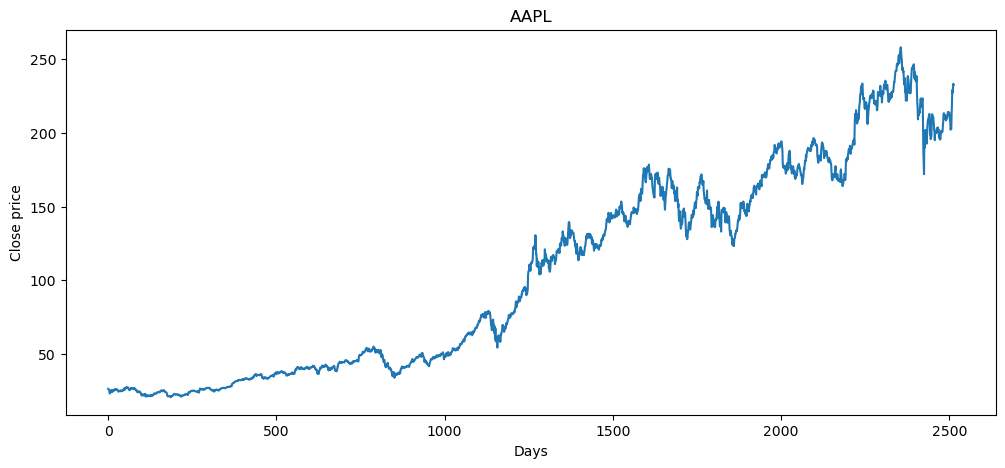

In [49]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## 3. Feature Engineering

In [50]:
temp_df=[10, 20, 30, 40, 50, 60, 70,80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [51]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [52]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [53]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800,NaN
1,2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800,NaN
2,2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000,NaN
3,2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400,NaN
4,2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000,NaN


In [54]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800,NaN
1,2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800,NaN
2,2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000,NaN
3,2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400,NaN
4,2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000,NaN
...,...,...,...,...,...,...,...
98,2016-01-06,22.726730,23.103630,22.539411,22.695134,273829600,NaN
99,2016-01-07,21.767559,22.598089,21.763046,22.270843,324377600,25.467084
100,2016-01-08,21.882658,22.367886,21.837521,22.241502,283192000,25.422622


Text(0, 0.5, 'Close price')

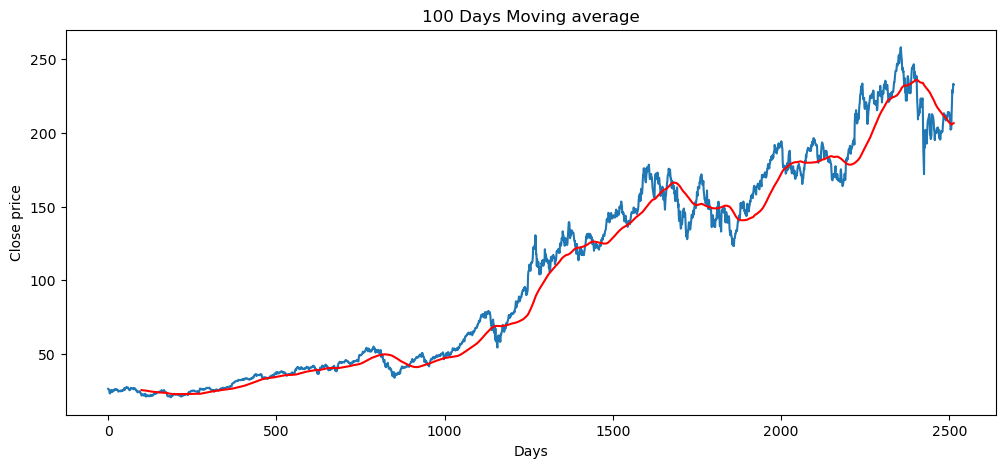

In [55]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r');
plt.title('100 Days Moving average')
plt.xlabel('Days')
plt.ylabel('Close price')

### 200 days Moving Average

In [56]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(209)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800,NaN,NaN
1,2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800,NaN,NaN
2,2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000,NaN,NaN
3,2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400,NaN,NaN
4,2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000,NaN,NaN
...,...,...,...,...,...,...,...,...
204,2016-06-08,22.587385,22.728926,22.528028,22.605647,83392400,22.725926,24.014915
205,2016-06-09,22.749468,22.827087,22.477798,22.486930,106405600,22.734210,24.012794
206,2016-06-10,22.562269,22.680981,22.482367,22.493780,126851600,22.741683,24.009040


Text(0, 0.5, 'Close price')

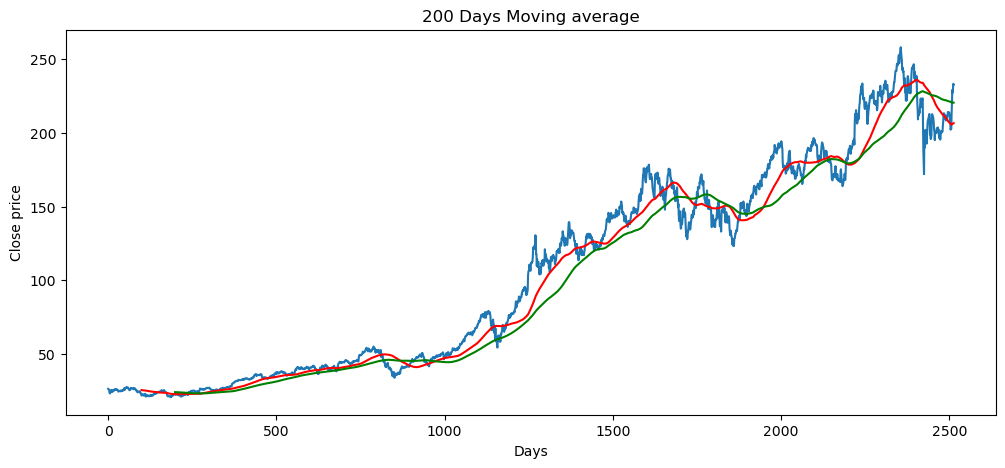

In [57]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r');
plt.plot(df['MA_200'], 'g');
plt.title('200 Days Moving average')
plt.xlabel('Days')
plt.ylabel('Close price')

In [58]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-17,26.328852,26.438967,25.955806,26.077158,163538800,NaN,NaN
1,2015-08-18,26.180529,26.391771,26.070414,26.164798,138242800,NaN,NaN
2,2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000,NaN,NaN
3,2015-08-20,25.315336,25.697369,25.086115,25.636694,274006400,NaN,NaN
4,2015-08-21,23.766970,25.146784,23.742250,24.816437,513102000,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000,205.969187,220.533023
2510,2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100,206.119280,220.492000
2511,2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200,206.268636,220.466413


### Calculating % changed in each trading session

In [59]:
df['Percentage Changed']= df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,26.328852,NaN
1,26.180529,-0.005633
2,25.845688,-0.012790
3,25.315336,-0.020520
4,23.766970,-0.061163
...,...,...
2509,229.090012,0.042358
2510,227.179993,-0.008337
2511,229.649994,0.010872


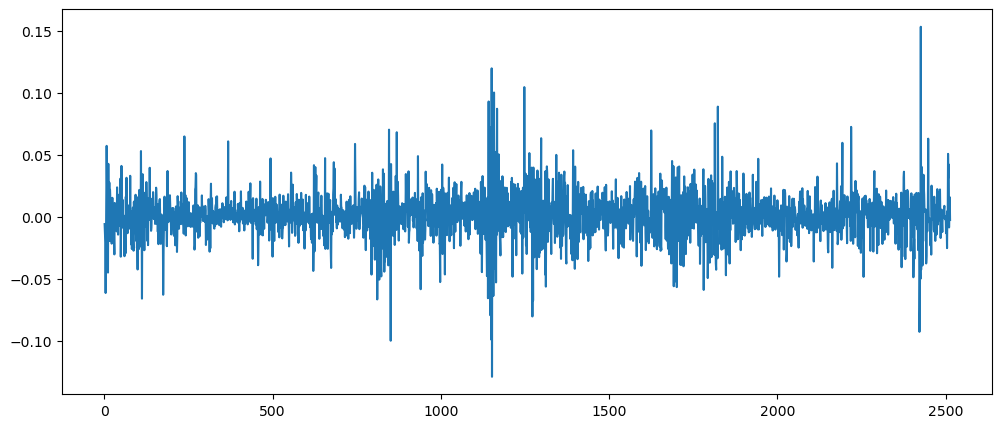

In [60]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

## 4. Data Preprocessing

In [61]:
df.shape

(2514, 9)

In [62]:
# splitting data into Training and Testing datasets
data_training= pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        26.328852
1        26.180529
2        25.845688
3        25.315336
4        23.766970
...            ...
1754    163.006882
1755    162.780457
1756    162.307907
1757    162.357117
1758    166.609985

[1759 rows x 1 columns]
Ticker        AAPL
1759    165.871658
1760    169.425552
1761    170.498611
1762    170.341095
1763    171.837479
...            ...
2509    229.090012
2510    227.179993
2511    229.649994
2512    233.330002
2513    232.779999

[755 rows x 1 columns]


In [63]:
type(data_training)

pandas.core.frame.DataFrame

In [64]:
data_training

Ticker,AAPL
0,26.328852
1,26.180529
2,25.845688
3,25.315336
4,23.766970
...,...
1754,163.006882
1755,162.780457
1756,162.307907
1757,162.357117


In [65]:
data_testing

Ticker,AAPL
1759,165.871658
1760,169.425552
1761,170.498611
1762,170.341095
1763,171.837479
...,...
2509,229.090012
2510,227.179993
2511,229.649994
2512,233.330002


In [66]:
# scaling down the data between 0 and 1

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [68]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03614775],
       [0.03520792],
       [0.03308625],
       ...,
       [0.89776127],
       [0.89807308],
       [0.92502082]], shape=(1759, 1))

In [69]:
type(data_training_array)

numpy.ndarray

In [70]:
data_training_array.shape

(1759, 1)

## 5. Sequence Creation

In [71]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [72]:
x_train

array([[[0.03614775],
        [0.03520792],
        [0.03308625],
        ...,
        [0.01619775],
        [0.01332338],
        [0.00724572]],

       [[0.03520792],
        [0.03308625],
        [0.02972575],
        ...,
        [0.01332338],
        [0.00724572],
        [0.00797503]],

       [[0.03308625],
        [0.02972575],
        [0.01991472],
        ...,
        [0.00724572],
        [0.00797503],
        [0.01022023]],

       ...,

       [[0.83399536],
        [0.86198557],
        [0.86839242],
        ...,
        [0.90418378],
        [0.90219023],
        [0.90075551]],

       [[0.86198557],
        [0.86839242],
        [0.88929182],
        ...,
        [0.90219023],
        [0.90075551],
        [0.89776127]],

       [[0.86839242],
        [0.88929182],
        [0.89800008],
        ...,
        [0.90075551],
        [0.89776127],
        [0.89807308]]], shape=(1659, 100, 1))

In [73]:
x_train.ndim

3

In [74]:
y_train.ndim

1

In [75]:
y_train.shape

(1659,)

## 6. Model Building

In [76]:
import tensorflow as tf
print(tf.__version__)

2.20.0-rc0


In [77]:
#Ml Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [78]:
model = Sequential()#this accepts sequence of data


model.add(Input(shape=(100, 1)))#100 previous data and 1 closing features
model.add(LSTM(units=128, activation='tanh', return_sequences=True))#want LSTM to have 128 neurons
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7. Model Training

In [79]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)#we are telling model to go through this x_train and y_train for 50 times

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - loss: 0.0105
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 5.5058e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 5.4788e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 4.6727e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 4.5868e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 4.3761e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 5.0894e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 4.4925e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 4.4384e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 4.0090e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 4.3238e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 4.1630e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 3.7446e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 3.2781e-04
Epoc

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [81]:
# Save the trained model
model.save('stock_prediction_model.keras')

## 8. Preparing Test Data

In [82]:
data_training.tail(100)

Ticker,AAPL
1659,160.971268
1660,162.345596
1661,165.722488
1662,167.086975
1663,170.876190
...,...
1754,163.006882
1755,162.780457
1756,162.307907
1757,162.357117


In [83]:
data_testing

Ticker,AAPL
1759,165.871658
1760,169.425552
1761,170.498611
1762,170.341095
1763,171.837479
...,...
2509,229.090012
2510,227.179993
2511,229.649994
2512,233.330002


In [84]:
past_100_days = data_training.tail(100)

In [85]:
past_100_days

Ticker,AAPL
1659,160.971268
1660,162.345596
1661,165.722488
1662,167.086975
1663,170.876190
...,...
1754,163.006882
1755,162.780457
1756,162.307907
1757,162.357117


In [86]:
final_df= pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,160.971268
1,162.345596
2,165.722488
3,167.086975
4,170.876190
...,...
850,229.090012
851,227.179993
852,229.649994
853,233.330002


In [87]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.79552512e-01],
       [2.89746134e-01],
       [3.14793100e-01],
       [3.24913722e-01],
       [3.53018956e-01],
       [3.57751676e-01],
       [3.64158963e-01],
       [3.88623407e-01],
       [3.79958919e-01],
       [3.56950610e-01],
       [3.54766182e-01],
       [3.84837185e-01],
       [3.60227083e-01],
       [3.36709138e-01],
       [3.38966113e-01],
       [3.24039996e-01],
       [2.92440311e-01],
       [3.06347156e-01],
       [3.26297197e-01],
       [2.89090953e-01],
       [2.87489385e-01],
       [3.04454045e-01],
       [3.03216342e-01],
       [2.97318464e-01],
       [2.63607124e-01],
       [2.71543771e-01],
       [2.27274718e-01],
       [2.25600039e-01],
       [2.77077106e-01],
       [2.33463574e-01],
       [2.35720662e-01],
       [2.46787670e-01],
       [2.94406195e-01],
       [2.27056173e-01],
       [2.32452111e-01],
       [1.94389003e-01],
       [2.12253759e-01],
       [1.53846755e-01],
       [1.25117124e-01],
       [1.58294722e-01],


In [88]:
input_data.shape

(855, 1)

In [89]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [90]:
x_test, y_test =np.array(x_test), np.array(y_test)

In [91]:
x_test[0].shape

(100, 1)

## 9. Making Predictions

In [92]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [93]:
y_predicted

array([[0.29761463],
       [0.3058939 ],
       [0.32130855],
       [0.33554772],
       [0.3428624 ],
       [0.35004088],
       [0.3525089 ],
       [0.34416023],
       [0.3244548 ],
       [0.30966392],
       [0.30333996],
       [0.3098012 ],
       [0.29770362],
       [0.2798884 ],
       [0.26076123],
       [0.24422605],
       [0.23689166],
       [0.22908327],
       [0.22083123],
       [0.2193675 ],
       [0.21627977],
       [0.2216918 ],
       [0.24431202],
       [0.23628567],
       [0.22705959],
       [0.21259582],
       [0.19767174],
       [0.1977787 ],
       [0.208719  ],
       [0.2106101 ],
       [0.2067184 ],
       [0.19645634],
       [0.18890016],
       [0.18726178],
       [0.1830723 ],
       [0.16152075],
       [0.1328036 ],
       [0.1209624 ],
       [0.12645578],
       [0.1368307 ],
       [0.1431989 ],
       [0.13348831],
       [0.12269018],
       [0.11160109],
       [0.1024496 ],
       [0.1070205 ],
       [0.10446465],
       [0.109

In [94]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [95]:
y_predicted

array([163.40645 , 164.52267 , 166.6009  , 168.52068 , 169.50685 ,
       170.47469 , 170.80743 , 169.68184 , 167.0251  , 165.03096 ,
       164.17834 , 165.04947 , 163.41844 , 161.01656 , 158.43779 ,
       156.20847 , 155.21964 , 154.16689 , 153.05432 , 152.85698 ,
       152.44069 , 153.17033 , 156.22006 , 155.13794 , 153.89406 ,
       151.94402 , 149.93192 , 149.94633 , 151.42133 , 151.67628 ,
       151.1516  , 149.76804 , 148.7493  , 148.5284  , 147.96358 ,
       145.05794 , 141.18622 , 139.58977 , 140.3304  , 141.72917 ,
       142.58774 , 141.27855 , 139.82272 , 138.32767 , 137.09383 ,
       137.71008 , 137.36551 , 138.02534 , 139.22481 , 140.25409 ,
       140.7359  , 142.11142 , 144.03506 , 146.4702  , 147.18024 ,
       145.57092 , 147.52768 , 149.05534 , 148.9917  , 146.5748  ,
       142.3995  , 139.0853  , 137.24992 , 136.64444 , 135.30208 ,
       137.68024 , 141.60527 , 144.3303  , 146.30496 , 146.87509 ,
       147.43825 , 147.96176 , 147.14449 , 146.97044 , 147.351

In [96]:
y_test

array([165.87165833, 169.42555237, 170.49861145, 170.34109497,
       171.83747864, 171.44367981, 168.85456848, 164.96594238,
       164.63124084, 164.92654419, 167.38771057, 161.0773468 ,
       158.87213135, 156.44050598, 154.77676392, 155.50526428,
       153.38870239, 152.12857056, 153.53634644, 152.05967712,
       154.92443848, 160.89027405, 151.44927979, 152.8964386 ,
       150.00212097, 148.35810852, 152.0793457 , 154.46177673,
       151.33117676, 150.36639404, 148.09230042, 148.42701721,
       149.40162659, 147.51144409, 140.26585388, 136.05236816,
       140.23631287, 143.8296051 , 144.12495422, 143.16999817,
       137.91296387, 138.237854  , 136.82025146, 136.19018555,
       140.76791382, 136.22955322, 140.19694519, 141.51611328,
       141.62438965, 141.16171265, 144.98141479, 147.12754822,
       149.97261047, 147.02906799, 142.54983521, 153.3197937 ,
       150.95706177, 148.30886841, 142.77619934, 136.72177124,
       136.45553589, 136.98802185, 137.55995178, 132.99

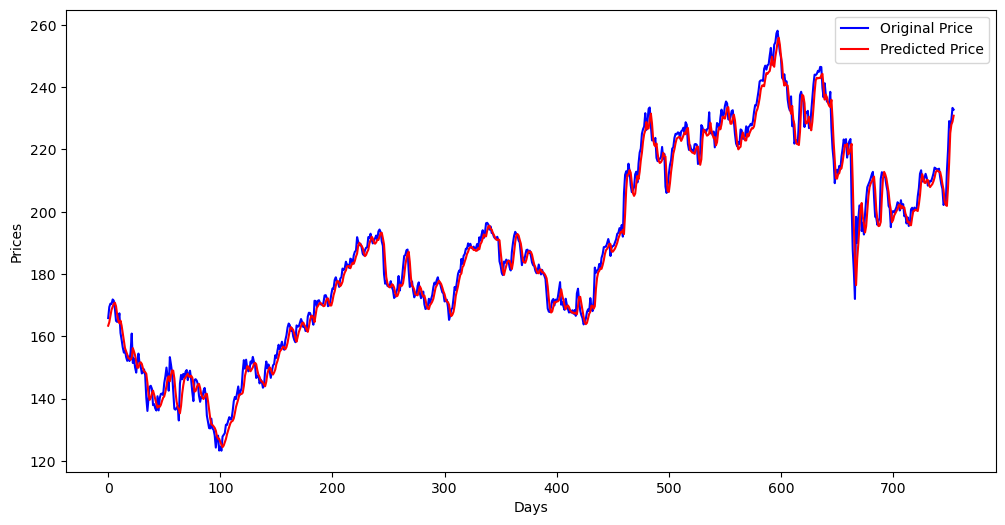

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price' )
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()

(140.0, 220.0)

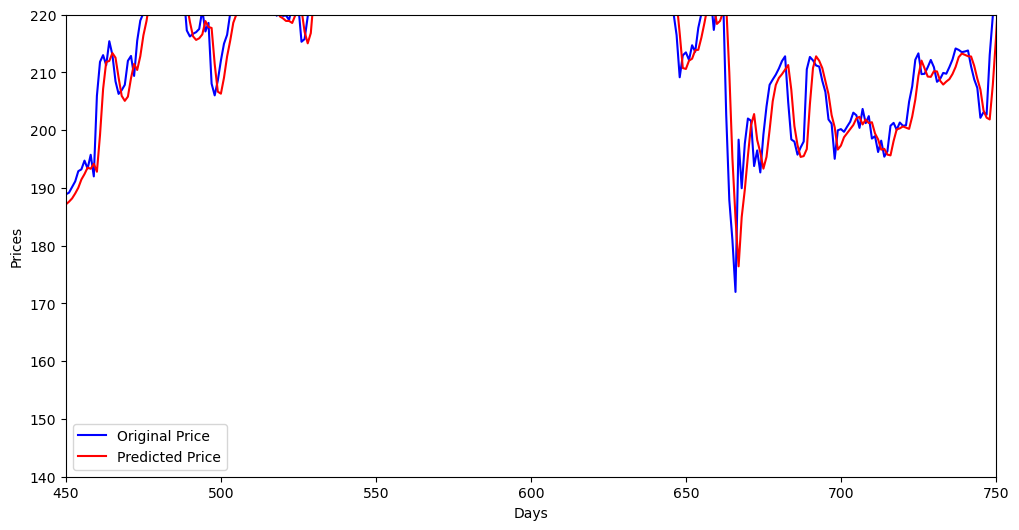

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price' )
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

## 10. Model Evaluation

In [99]:
# Mean squared Error(MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 14.653352729511903


In [101]:
# Root mean Squared Error(RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE):{rmse}')

Root Mean Squared Error (RMSE):3.8279697921368063


In [102]:
#R-Squared
r2= r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.984913132623598


## my own prediction

In [ ]:
full_data = pd.DataFrame(df['Close'])
scaled_full_data = scaler.fit_transform(full_data.values.reshape(-1, 1))

In [ ]:
last_100_days = scaled_full_data[-100:]
current_input = last_100_days.reshape(1, 100, 1)

In [ ]:
future_predictions = []
for i in range(5):
    next_pred = model.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    # Append the prediction and shift the input window
    current_input = np.append(current_input[0], next_pred, axis=0)[1:].reshape(1, 100, 1)

In [ ]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

In [ ]:
print(f"Predicted closing prices for the next 5 trading days for {ticker}:")
for day, price in enumerate(future_predictions, 1):
    print(f"Day {day}: {price:.2f}")

In [ ]:
future_dates = []
current_date = df['Date'].iloc[-1]
count = 0
while count < 5:
    # Increment to next day
    next_day = current_date.day + 1
    next_month = current_date.month
    next_year = current_date.year
    try:
        next_date = datetime(next_year, next_month, next_day)
    except ValueError:
        # Handle month rollover
        next_month += 1
        if next_month > 12:
            next_month = 1
            next_year += 1
        next_day = 1
        next_date = datetime(next_year, next_month, next_day)

In [ ]:
if next_date.weekday() < 5:
    future_dates.append(next_date)
    count += 1

In [ ]:
current_date = next_date

In [ ]:
today_date = datetime(now.year, now.month, now.day)
today_data = df[df['Date'].dt.date == today_date.date()][['Date', 'Close']]

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(today_data['Date'], today_data['Close'], 'bo', label='Today\'s Close Price')  # Plot as a point
plt.plot(future_dates, future_predictions, 'r--', label='Predicted Future Price')
plt.title(f'Today and Predicted Future Prices for {ticker} (From {today_date.strftime('%B %d, %Y')})')
plt.xlabel('Date')
plt.ylabel('Price')
# Format x-axis to show only dates without time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Rotate dates for better readability
plt.legend()
plt.show()